# Iris Data Set

**Source:** https://archive.ics.uci.edu/ml/datasets/Iris

**Data Set Information:**
This dataset perhaps is the best known database to be found in the pattern recognition literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of Iris plant. One class is linearly separable from the other 2; The latter are NOT linearly separable from each other.

**Predicted Attribute:** class of iris plant. 

**Attribute Information:**
1. sepal length (cm)
2. sepal width (cm) 
3. petal length (cm)
4. petal width (cm) 
5. class: 
    - Iris Setosa 
    - Iris Versicolour 
    - Iris Virginica

**Objectives:**
- Explore Iris Dataset
- Train a model to predict iris class
- Evaluate the model performance

## Data Exploration

We start by visualizing the data. In this section we will use pyplot from matplotlib module and seaborn. (One of them is enough but in this practice we will practice with both methods)

**Note:** This data set is so famous that you can load them using sklearn and seaborn.

**matplotlib.pyplot method:**
In this method we load the data set from sklearn.

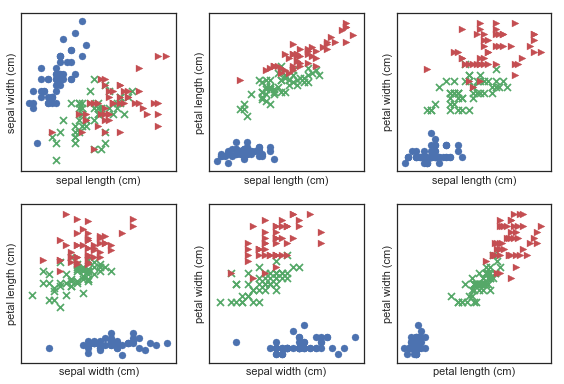

In [124]:
import numpy as np
from sklearn.datasets import load_iris
data = load_iris() # Load_iris returns an object with several field
features = data.data
feature_names = data.feature_names
target = data.target
target_names = data.target_names
"""
print(features)
print('-'*40)
print(feature_names)
print('-'*40)
print(target)
print('-'*40)
print(target_names)
"""
from matplotlib import pyplot as plt
fig,axes = plt.subplots(2, 3)
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# Set up 3 different pairs of (color, marker)
color_markers = [
        ('b', 'o'), # Iris Setosa
        ('g', 'x'), # Iris Versicolor
        ('r', '>'), # Iris Virginica
        ]
for i, (p0, p1) in enumerate(pairs):
    ax = axes.flat[i]

    for j in range(3):
        c,marker = color_markers[j]
        ax.scatter(features[target == j, p0], features[
                    target == j, p1], marker=marker, c=c)
    ax.set_xlabel(feature_names[p0])
    ax.set_ylabel(feature_names[p1])
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

**seaborn.pairplot method:**
In this method we reload the iris dataset using seaborn.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


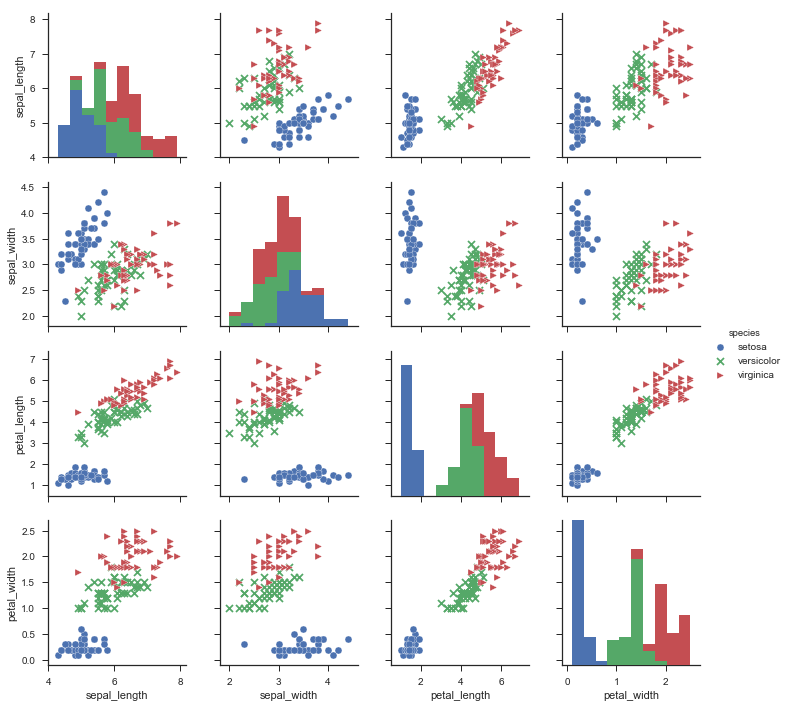

In [125]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species", markers=["o", "x", ">"])
iris.head()

## Training the model
In this section, we will train:
- Simple Threshold model
- kNN model
- Decision Tree

### Simple Threshold Model
From the visualization, we could easily differentiate Iris Setosa. 
First, we will find the best threshold to separates Iris Setosa flowers from the other two species without making any mistake:

In [126]:
labels = target_names[target]
plength = features[:, 2]

# To use numpy operations to get setosa features,
# we build a boolean array
is_setosa = (labels == 'setosa')

max_setosa = plength[is_setosa].max()
min_non_setosa = plength[~is_setosa].min()

print('Maximum of setosa: {0}.'.format(max_setosa))
print('Minimum of others: {0}.'.format(min_non_setosa))

Maximum of setosa: 1.9.
Minimum of others: 3.0.


Next, we will use several method to separate Iris Virginica and Iris Versicolor:
- Computing the best threshold and visualizing the decision boundary
- Heldout method
- threshold method
- KNearestNeighbor method

### Computing the best threshold and visualizing the decision boundary
We run a loop over all possible features and thresholds to see which one results in better accuracy.

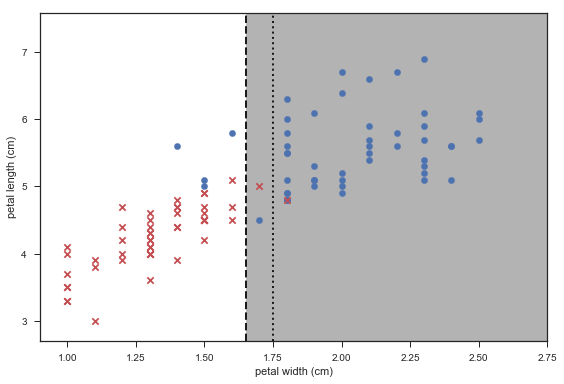

From the computation and decision boundary, it could be conclude the best threshold to separate Virginica and Versicolor is between 1.65 and 1.75.
Best threshold is 1.6 on feature petal width (cm) (index 3), which achieves accuracy of 94.0%.


In [127]:
features = features[~is_setosa] # Remove Iris Setosa from features
labels = labels[~is_setosa] # Remove Iris Setosa from labels
is_virginica = (labels == 'virginica')

# Initialize to a value that is worse than any possible test
best_acc = -1.0

# Loop over all the features
for fi in range(features.shape[1]):
    # Test every possible threshold value for feature fi
    thresh = features[:, fi].copy()

    # Test them in order
    thresh.sort()
    for t in thresh:

        # Generate predictions using t as a threshold
        pred = (features[:, fi] > t)

        # Accuracy is the fraction of predictions that match reality
        acc = (pred == is_virginica).mean()

        # We test whether negating the test is a better threshold:
        acc_neg = ((~pred) == is_virginica).mean()
        if acc_neg > acc:
            acc = acc_neg
            negated = True
        else:
            negated = False

        # If this is better than previous best, then this is now the new best:

        if acc > best_acc:
            best_acc = acc
            best_fi = fi
            best_t = t
            best_is_negated = negated

COLOUR_FIGURE = False

# Hand fixed thresholds:
t = 1.65
t2 = 1.75

# Features to use: 3 & 2
f0, f1 = 3, 2

if COLOUR_FIGURE:
    area1c = (1., .8, .8)
    area2c = (.8, .8, 1.)
else:
    area1c = (1., 1, 1)
    area2c = (.7, .7, .7)

# Plot from 90% of smallest value to 110% of largest value
# (all feature values are positive, otherwise this would not work very well)

x0 = features[:, f0].min() * .9
x1 = features[:, f0].max() * 1.1

y0 = features[:, f1].min() * .9
y1 = features[:, f1].max() * 1.1

fig,ax = plt.subplots()
ax.fill_between([t, x1], [y0, y0], [y1, y1], color=area2c)
ax.fill_between([x0, t], [y0, y0], [y1, y1], color=area1c)
ax.plot([t, t], [y0, y1], 'k--', lw=2)
ax.plot([t2, t2], [y0, y1], 'k:', lw=2)
ax.scatter(features[is_virginica, f0],
            features[is_virginica, f1], c='b', marker='o', s=40)
ax.scatter(features[~is_virginica, f0],
            features[~is_virginica, f1], c='r', marker='x', s=40)
ax.set_ylim(y0, y1)
ax.set_xlim(x0, x1)
ax.set_xlabel(feature_names[f0])
ax.set_ylabel(feature_names[f1])
fig.tight_layout()
plt.show()
print("From the computation and decision boundary, it could be conclude the best threshold to separate Virginica and Versicolor is between 1.65 and 1.75.")
            
print('Best threshold is {0} on feature {1} (index {2}), which achieves accuracy of {3:.1%}.'.format(
    best_t, data.feature_names[best_fi], best_fi, best_acc))

### KNN Model

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import KFold
knn = KNeighborsClassifier(n_neighbors = 1)
kf = KFold(len(features),n_folds=5, shuffle=True)
mean_list = [] # List of mean accuracies
for train,test in kf:
    # fit a model for this fold, then apply it to the test data with predict
    knn.fit(features[train],labels[train])
    prediction = knn.predict(features[test])    
    curmean = np.mean(prediction==labels[test])
    mean_list.append(curmean)
print("Mean accuracy: %f" % (np.mean(mean_list)*100))

Mean accuracy: 94.000000


### Decision Trees

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# Use data from iris
all_inputs = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
all_classes = iris['species'].values
# Splitting the data 0.7 train, 0.3 test
(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.7, random_state=1)
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(train_inputs, train_classes)
acc = dtc.score(test_inputs, test_classes)
print("Accuracy: %f" % (acc*100))

Accuracy: 95.555556
